### Exercise 1d)

In this section, we present all non-stochastic GD results for OLS and Ridge regression. 

In [51]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
from methods.training_methods import GradientDescent
from methods.step_methods import ConstantLearningRateStep, MomentumStep, ADAgradStep, RMSpropStep, AdamStep
from methods.regression_methods import OLS_Gradient, Ridge_Gradient, Lasso_Gradient
from sklearn.preprocessing import PolynomialFeatures
from utils import generate_dataset

In [52]:
# Generating dataset
np.random.seed(124)
x, y = generate_dataset()

In [53]:
# Define parameters and initial conditions for gradient descent. 
# NOTE: we defined the seed for numpy random in the code block above. Thus, if you run this 
# block several times, then "theta" may not be the same every time. Therefore, it is important 
# that you run the whole notebook in order to generate the same results as in the report.

p = 6
X = PolynomialFeatures(p,include_bias = False).fit_transform(x.reshape(-1, 1))
num_features = X.shape[1]

theta = np.random.uniform(-1, 1, X.shape[1])
iterations = 20000

In [54]:
# Plot 1 - R2 as a function of the number of iterations with OLS regression, for ordinary, momentum, Adagrad, RMSProp and Adam GD

iterations = 10**4

gd_constant = GradientDescent(X, y, gradient=OLS_Gradient(), starting_parameters=theta, step_method=ConstantLearningRateStep(learning_rate=0.2))
gd_momentum = GradientDescent(X, y, gradient=OLS_Gradient(), starting_parameters=theta, step_method=MomentumStep(learning_rate=0.3, momentum=0.7))
gd_ADAgrad = GradientDescent(X, y, gradient=OLS_Gradient(), starting_parameters=theta, step_method=ADAgradStep(learning_rate=0.3))
gd_RMSprop = GradientDescent(X, y, gradient=OLS_Gradient(), starting_parameters=theta, step_method=RMSpropStep(learning_rate=0.008, decay_rate=0.9))
gd_Adam = GradientDescent(X, y, gradient=OLS_Gradient(), starting_parameters=theta, step_method=AdamStep(learning_rate=0.1, beta1=0.9, beta2=0.999))


One_minus_R2_data_gd_constant_step = gd_constant.train(iterations=iterations)
One_minus_R2_data_gd_momentum = gd_momentum.train(iterations=iterations)
One_minus_R2_data_gd_ADAgrad = gd_ADAgrad.train(iterations=iterations)
One_minus_R2_data_gd_RMSprop = gd_RMSprop.train(iterations=iterations)
One_minus_R2_data_gd_Adam = gd_Adam.train(iterations=iterations)

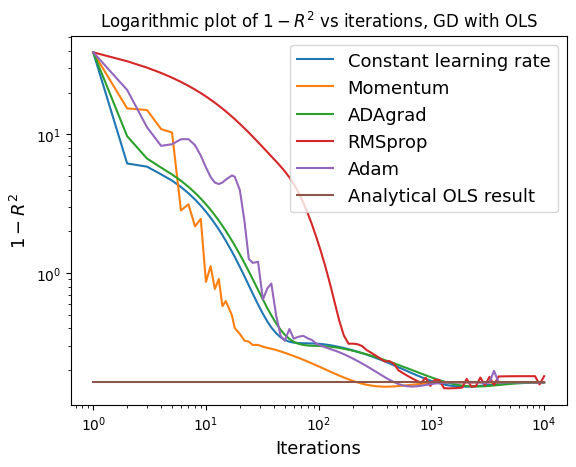

In [55]:
plt.plot(One_minus_R2_data_gd_constant_step[0], One_minus_R2_data_gd_constant_step[1], label='Constant learning rate')
plt.plot(One_minus_R2_data_gd_momentum[0], One_minus_R2_data_gd_momentum[1], label='Momentum')
plt.plot(One_minus_R2_data_gd_ADAgrad[0], One_minus_R2_data_gd_ADAgrad[1], label='ADAgrad')
plt.plot(One_minus_R2_data_gd_RMSprop[0], One_minus_R2_data_gd_RMSprop[1], label='RMSprop')
plt.plot(One_minus_R2_data_gd_Adam[0], One_minus_R2_data_gd_Adam[1], label='Adam')

analytical_1_R2 = gd_constant.analytical_OLS_1_R2()
plt.plot(One_minus_R2_data_gd_constant_step[0],np.ones(len(One_minus_R2_data_gd_constant_step[0]))*analytical_1_R2,label="Analytical OLS result")

plt.title("Logarithmic plot of $1 - R^2$ vs iterations, GD with OLS")
plt.xlabel("Iterations",fontsize = 13)
plt.ylabel("$1 - R^2$",fontsize = 13)
plt.loglog()
plt.legend(loc="upper right",fontsize = 13)

plt.show()

In [56]:
print("Value of 1 - R2 at the minimum of the cost function, OLS regression: ",analytical_1_R2)

Value of 1 - R2 at the minimum of the cost function, OLS regression:  0.16288433039333525


In [57]:
# Plot 1 - R2 as a function of the number of iterations with Ridge regression, for ordinary, momentum, Adagrad, RMSProp and Adam GD

iterations = 10**4

gd_constant = GradientDescent(X, y, gradient=Ridge_Gradient(10**1), starting_parameters=theta, step_method=ConstantLearningRateStep(learning_rate=0.04))
gd_momentum = GradientDescent(X, y, gradient=Ridge_Gradient(10**1), starting_parameters=theta, step_method=MomentumStep(learning_rate=0.002, momentum=0.7))
gd_ADAgrad = GradientDescent(X, y, gradient=Ridge_Gradient(10**1), starting_parameters=theta, step_method=ADAgradStep(learning_rate=0.4))
gd_RMSprop = GradientDescent(X, y, gradient=Ridge_Gradient(10**1), starting_parameters=theta, step_method=RMSpropStep(learning_rate=0.005, decay_rate=0.9))
gd_Adam = GradientDescent(X, y, gradient=Ridge_Gradient(10**1), starting_parameters=theta, step_method=AdamStep(learning_rate=0.05, beta1=0.9, beta2=0.999))

One_minus_R2_data_gd_constant_step = gd_constant.train(iterations=iterations)
One_minus_R2_data_gd_momentum = gd_momentum.train(iterations=iterations)
One_minus_R2_data_gd_ADAgrad = gd_ADAgrad.train(iterations=iterations)
One_minus_R2_data_gd_RMSprop = gd_RMSprop.train(iterations=iterations)
One_minus_R2_data_gd_Adam = gd_Adam.train(iterations=iterations)

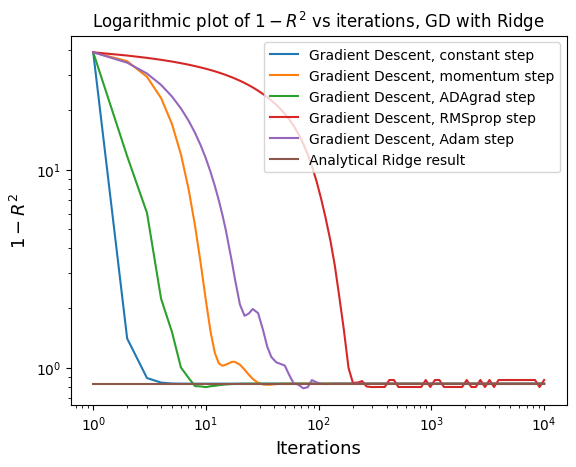

In [58]:
plt.plot(One_minus_R2_data_gd_constant_step[0], One_minus_R2_data_gd_constant_step[1], label='Gradient Descent, constant step')
plt.plot(One_minus_R2_data_gd_momentum[0], One_minus_R2_data_gd_momentum[1], label='Gradient Descent, momentum step')
plt.plot(One_minus_R2_data_gd_ADAgrad[0], One_minus_R2_data_gd_ADAgrad[1], label='Gradient Descent, ADAgrad step')
plt.plot(One_minus_R2_data_gd_RMSprop[0], One_minus_R2_data_gd_RMSprop[1], label='Gradient Descent, RMSprop step')
plt.plot(One_minus_R2_data_gd_Adam[0], One_minus_R2_data_gd_Adam[1], label='Gradient Descent, Adam step')

analytical_1_R2 = gd_constant.analytical_Ridge_1_R2(10**1)
plt.plot(One_minus_R2_data_gd_constant_step[0],np.ones(len(One_minus_R2_data_gd_constant_step[0]))*analytical_1_R2,label="Analytical Ridge result")

plt.title(r"Logarithmic plot of $1 - R^2$ vs iterations, GD with Ridge")
plt.xlabel("Iterations",fontsize = 13)
plt.ylabel(r"$1 - R^2$",fontsize = 13)
plt.loglog()
plt.legend(loc="upper right")

plt.show()

In [59]:
print("Value of 1 - R2 at the minimum of the cost function, Ridge regression: ",analytical_1_R2)

Value of 1 - R2 at the minimum of the cost function, Ridge regression:  0.8308420119630024


In the code block below, we tested different collections of learning rates and plotted $1 - R^2$ as a function of the number of iterations for the learning rates that were chosen. Thus, this is the "playing ground" for the manual grid search for OLS and Ridge regression that we explained in the report. 

In the plot below, we have given a basic example, using RMSProp with Ridge regression. We see that for learning rates larger than 0.005, there are significant fluctuations around the minimum. Thus, despite that the minimum is reached the latest for a learning rate of 0.005, we choose this as the optimal value.  

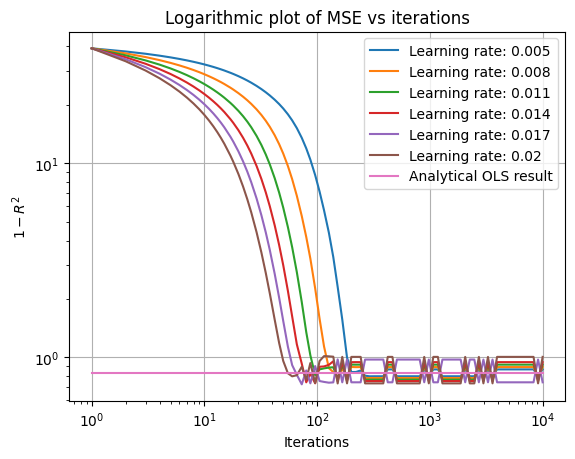

In [60]:
# Plot 1 - R2 as a function of the number of iterations for several values of the learning rate

iterations = 10**4

learning_rates = np.linspace(0.005,0.02,6) 

for i in range(len(learning_rates)): 
    gd_constant = GradientDescent(X, y, gradient=Ridge_Gradient(10), starting_parameters=theta, step_method=RMSpropStep(learning_rate=learning_rates[i],decay_rate = 0.9))
    One_minus_R2_data_gd_constant_step = gd_constant.train(iterations=iterations)
    analytical_1_R2 = gd_constant.analytical_Ridge_1_R2(10)
    plt.plot(One_minus_R2_data_gd_constant_step[0], One_minus_R2_data_gd_constant_step[1], label=f"Learning rate: {round(learning_rates[i],5)}")

plt.plot(One_minus_R2_data_gd_constant_step[0],np.ones(len(One_minus_R2_data_gd_constant_step[0]))*analytical_1_R2,label="Analytical OLS result")

plt.title("Logarithmic plot of MSE vs iterations")
plt.xlabel("Iterations")
plt.ylabel(r"$1 - R^2$")
plt.loglog()
plt.grid()
plt.legend()

plt.show()

## NOTES 

Here, we present some notes and details on the observations that were made during the manual search. We first made a broad search for learning rates, to get a sense of the landscape. The "interval of learning rate" then refers to the finer range of learning rates in which we looked for optimal values, as described in the report. 

OLS regression: 

-Momentum, interval of learning rate: 0.1 to 0.4. Optimal value of 0.3 had few oscillations for the first 10 iterations. Generically, there are a lot of oscillations. All learning rates in this interval converged for roughly the same number of iterations; in particular, their development was roughly the same after ca. 30 iterations, but with some offset in $1 - R^2$. 

-Adagrad: very robust for a large interval of learning rates. In particular, for learning rates from 0.3 and above, the evolution of $1 - R^2$ as a function of iterations develops in almost exactly the same way after roughly 10 iterations. Interval of learning rates: 0.2 to 1. Optimal value: 0.3

-RMSProp: For a learning rate larger than roughly 0.01, 1 - R2 does not converge to correct answer. It converges to an answer bigger than analytical one. Interval: 0.001 to 0.009. Optimal value: 0.008

-Adam: after the solution reached the minimum, I found that the solution was unstable around the minimum for learning rates larger than roughly 0.10. $1- R^2$ started oscillating around minimum after between 10^3 and 10^5 iterations. For learning rates larger than roughly 0.03, the MSE converged after roughly the same number of iterations (roughly 2*10^2 iterations). 

Ridge regression: 

-Momentum, interval of learning rate: 0.002 to 0.01. For learning rates between roughly 0.002 and 0.1, the momentum gradient descent converged after roughly the same number of iterations (ca. 30 iterations). 

-Adagrad, interval of learning rates: 0.4 to 2.0. For learning rates larger than 0.4, the parameters converged to the minimum after roughly the same number of iterations. Converged after roughly 10 iterations. For larger learning rates, there were more oscillations in $1 - R^2$ as the parameters converged towards the optimal values. 

-RMSprop with learning rates larger than roughly 0.01 does not converge to correct answer. Moreover, for larger learning rates, there are larger and larger oscillations around the minimum in $1 - R^2$. Interval: 0.004 to 0.01. 

-Adam with learning rates larger than roughly 0.05: $1 - R^2$ converges after roughly the same number 10^2 of iterations. But after 10^4 to 10^5 iterations, it starts to oscillate again. For larger learning rates, the oscillation is larger. 
